In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, roc_curve, auc
import os
import sys
from tabulate import tabulate

In [2]:
def calculate_metrics(pred_prob, GT):
    fpr, tpr, thresholds = roc_curve(GT, pred_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    pred_labels = (pred_prob >= optimal_threshold).astype(int)
    #print("prediction: ", pred_labels)
    #print("GT: ", GT)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
    TP = ((pred_labels == 1) & (GT == 1)).sum()
    TN = ((pred_labels == 0) & (GT == 0)).sum()
    FP = ((pred_labels == 1) & (GT == 0)).sum()
    FN = ((pred_labels == 0) & (GT == 1)).sum()
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    auc_score = auc(fpr, tpr)

    results = [
        ["True Positives (TP)", TP],
        ["True Negatives (TN)", TN],
        ["False Positives (FP)", FP],
        ["False Negatives (FN)", FN],
        ["Sensitivity", sensitivity],
        ["Precision", precision],
        ["Specificity", specificity],
        ["AUC", auc_score]
    ]
    # Print results in tabular form
    print(tabulate(results, headers=["Metric", "Value"], tablefmt="fancy_grid"))

    return auc

In [28]:
data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/classification/experiment_4/CV_3/Metrics/epoch_176.csv")
data

Unnamed: 0  pat_ID  scan_date  GT  prediction  \
0             0     NaN   20100730   1           1   
1             1     NaN   20100902   0           0   
2             2     NaN   20100930   1           1   
3             3     NaN   20101217   1           1   
4             4     NaN   20110214   1           1   
..          ...     ...        ...  ..         ...   
170         170     NaN   20220105   1           1   
171         171     NaN   20220222   0           0   
172         172     NaN   20220317   0           0   
173         173     NaN   20220525   1           1   
174         174     NaN   20220610   0           0   

     prediction_probability (diagnosis)       patient_ID  
0                              0.999999  npr967652562138  
1                              0.000311  npr824033832482  
2                              0.999995  npr967652562138  
3                              0.999996  npr836330552250  
4                              0.999992  npr907969432480  
..                                  ...              ...  
170                            0.999998  npr830777980836  
171                            0.000341  npr808001897300  
172                            0.013648  npr766979198093  
173                            0.999994  npr941474905628  
174                            0.000520  npr808001897300  

[175 rows x 7 columns]

In [29]:
### For classification

╒══════════════════════╤═══════════╕
│ Metric               │     Value │
╞══════════════════════╪═══════════╡
│ True Positives (TP)  │ 98        │
├──────────────────────┼───────────┤
│ True Negatives (TN)  │ 72        │
├──────────────────────┼───────────┤
│ False Positives (FP) │  3        │
├──────────────────────┼───────────┤
│ False Negatives (FN) │  2        │
├──────────────────────┼───────────┤
│ Sensitivity          │  0.98     │
├──────────────────────┼───────────┤
│ Precision            │  0.970297 │
├──────────────────────┼───────────┤
│ Specificity          │  0.96     │
├──────────────────────┼───────────┤
│ AUC                  │  0.996933 │
╘══════════════════════╧═══════════╛


<function sklearn.metrics._ranking.auc(x, y)>

In [ ]:
calculate_metrics(data["prediction (age)"], data["GT"])

In [13]:
data.GT.value_counts()

GT
1    133
0     51
Name: count, dtype: int64

### For regression

In [14]:
data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/experiment_5/CV_0/Metrics/epoch_25.csv")
data

,Unnamed: 0,patient_ID,scan_date,GT,prediction (age)
0,0,npr102928239238,20101115,54.0,43.382510
1,1,npr192198005019,20110204,63.0,61.889454
2,2,npr161070247318,20110307,55.0,51.591100
3,3,npr113096472044,20110318,58.0,48.261227
4,4,npr161070247318,20110502,55.0,55.688744
...,...,...,...,...,...
178,178,npr175454576662,20220322,57.0,70.846180
179,179,npr152649782713,20220422,65.0,63.477192
180,180,npr100825923056,20220510,69.0,65.826950
181,181,npr110222274795,20220512,72.0,75.423590


In [15]:
metric = mean_absolute_error(np.array(data["GT"]), np.array(data["prediction (age)"]))
metric_r_squared = r2_score(data["GT"], data["prediction (age)"])

In [16]:
print(metric)
print(metric_r_squared)

7.772484535519125
0.4844807790953345


In [7]:
data["prediction_probability (diagnosis)"].hist()

KeyboardInterrupt: 

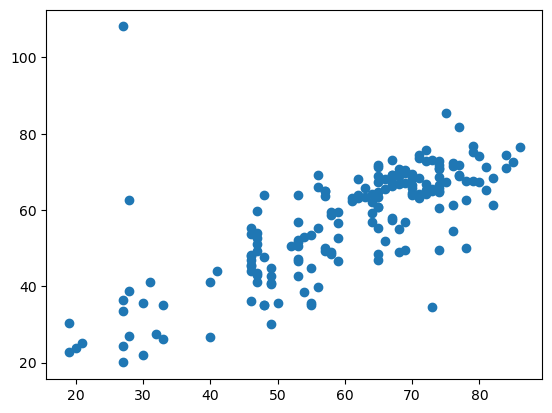

In [9]:
plt.scatter(data['GT'], data["prediction (age)"])

In [4]:
metric_r_squared = r2_score(data["GT"], data["prediction (age)"])
metric_r_squared

0.42363269811419035

In [5]:
metric_mae = mean_absolute_error(data["GT"], data["prediction (age)"])
metric_mae

8.559745699453552

In [9]:
cv_mae_arr = np.load("/home/ashish/Ashish/UCAN/Results/regression/CV_0/MAE.npy")
for i in range(1,10):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/regression/CV_"+str(i)+"/MAE.npy")
    cv_mae_arr = np.column_stack((cv_mae_arr,temp))

In [12]:
cv_mae_arr.shape

(100, 10)

In [16]:
cv_mae_df = pd.DataFrame(cv_mae_arr)
cv_mae_df

,0,1,2,3,4,5,6,7,8,9
0,51.661053,48.158104,51.674908,52.617352,55.328171,51.308605,56.343346,55.107410,54.097870,52.279545
1,43.142235,39.833427,42.676178,44.031742,46.883724,42.839451,47.697330,46.962372,45.799915,43.470936
2,33.354710,31.386930,32.883240,33.960438,36.776108,33.062870,37.441223,36.595123,36.411240,33.704086
3,24.830868,23.659641,24.497389,26.422621,28.304047,24.539446,27.806583,27.303890,27.541706,25.199089
4,17.132412,18.158442,18.267647,20.218649,21.517527,17.344740,18.381001,20.201271,22.732367,19.300184
...,...,...,...,...,...,...,...,...,...,...
95,10.752807,12.237461,11.125750,12.396550,13.261600,39.485367,9.334105,10.946307,11.685050,12.098037
96,10.247961,17.036654,11.745240,10.241927,9.655628,71.689728,9.432148,10.935596,11.764961,13.189807
97,11.452875,16.591263,11.350291,9.978444,15.025595,13.103395,9.445883,12.095978,12.992887,11.825154
98,10.604988,12.258729,17.320435,21.466084,14.135279,12.375731,9.317575,20.422445,13.106354,11.919526


<Axes: >

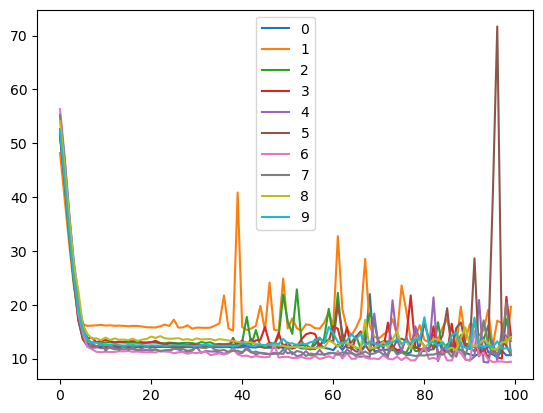

In [17]:
cv_mae_df.plot()

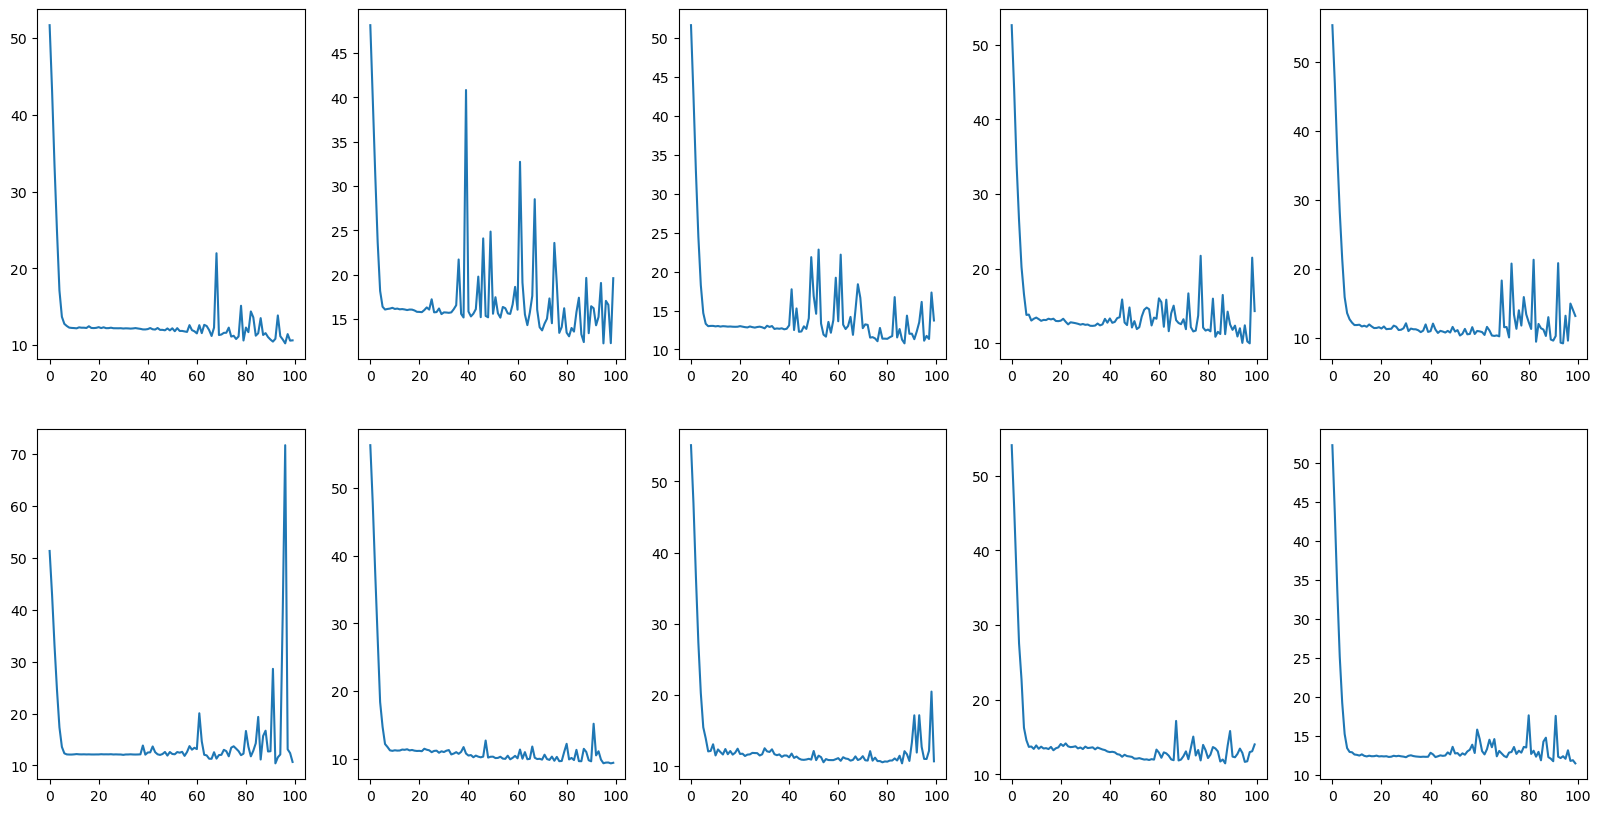

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        axs[i, j].plot(range(100), cv_mae_df.loc[:,cv].values)
        cv += 1
plt.show()

In [29]:
df = pd.read_excel("/home/ashish/Ashish/UCAN/dataset_for_training_regression_v2.xlsx")

In [30]:
df.columns

Index(['Unnamed: 0', 'patient_ID', 'scan_date', 'SUV_MIP', 'CT_MIP',
       'SUV_bone', 'CT_bone', 'SUV_lean', 'CT_lean', 'SUV_adipose',
       'CT_adipose', 'SUV_air', 'CT_air', 'patient_age',
       'incorrect_projection'],
      dtype='object')

<Axes: >

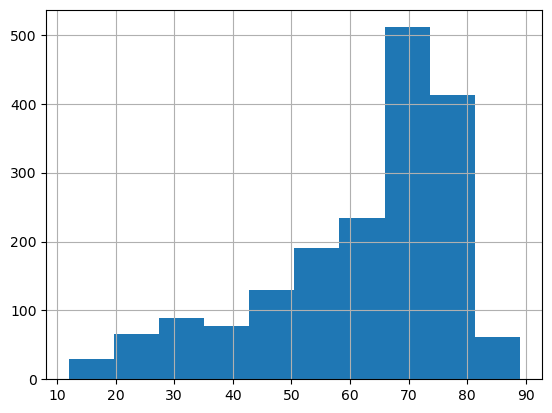

In [31]:
df['patient_age'].hist()

In [30]:

cv_auc_arr = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_4/CV_3/AUC.npy")
for i in range(1,4):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_4/CV_"+str(i)+"/AUC.npy")
    cv_auc_arr = np.column_stack((cv_auc_arr,temp))

In [31]:
cv_auc_arr.shape

(200, 4)

In [32]:
cv_auc_df = pd.DataFrame(cv_auc_arr)
cv_auc_df

,0,1,2,3
0,0.690267,0.706914,0.679692,0.690267
1,0.691467,0.717677,0.675572,0.691467
2,0.666400,0.734041,0.688862,0.666400
3,0.694667,0.735220,0.696305,0.694667
4,0.696933,0.743181,0.694710,0.696933
...,...,...,...,...
195,0.982800,0.992776,0.990696,0.982800
196,0.984667,0.993366,0.988969,0.984667
197,0.985600,0.993808,0.956672,0.985600
198,0.994533,0.987911,0.985513,0.994533


<Axes: >

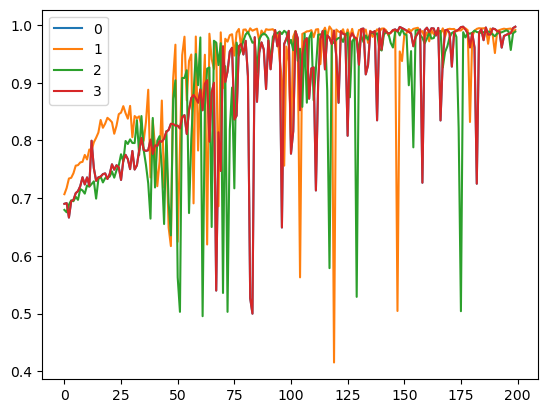

In [33]:
cv_auc_df.plot()

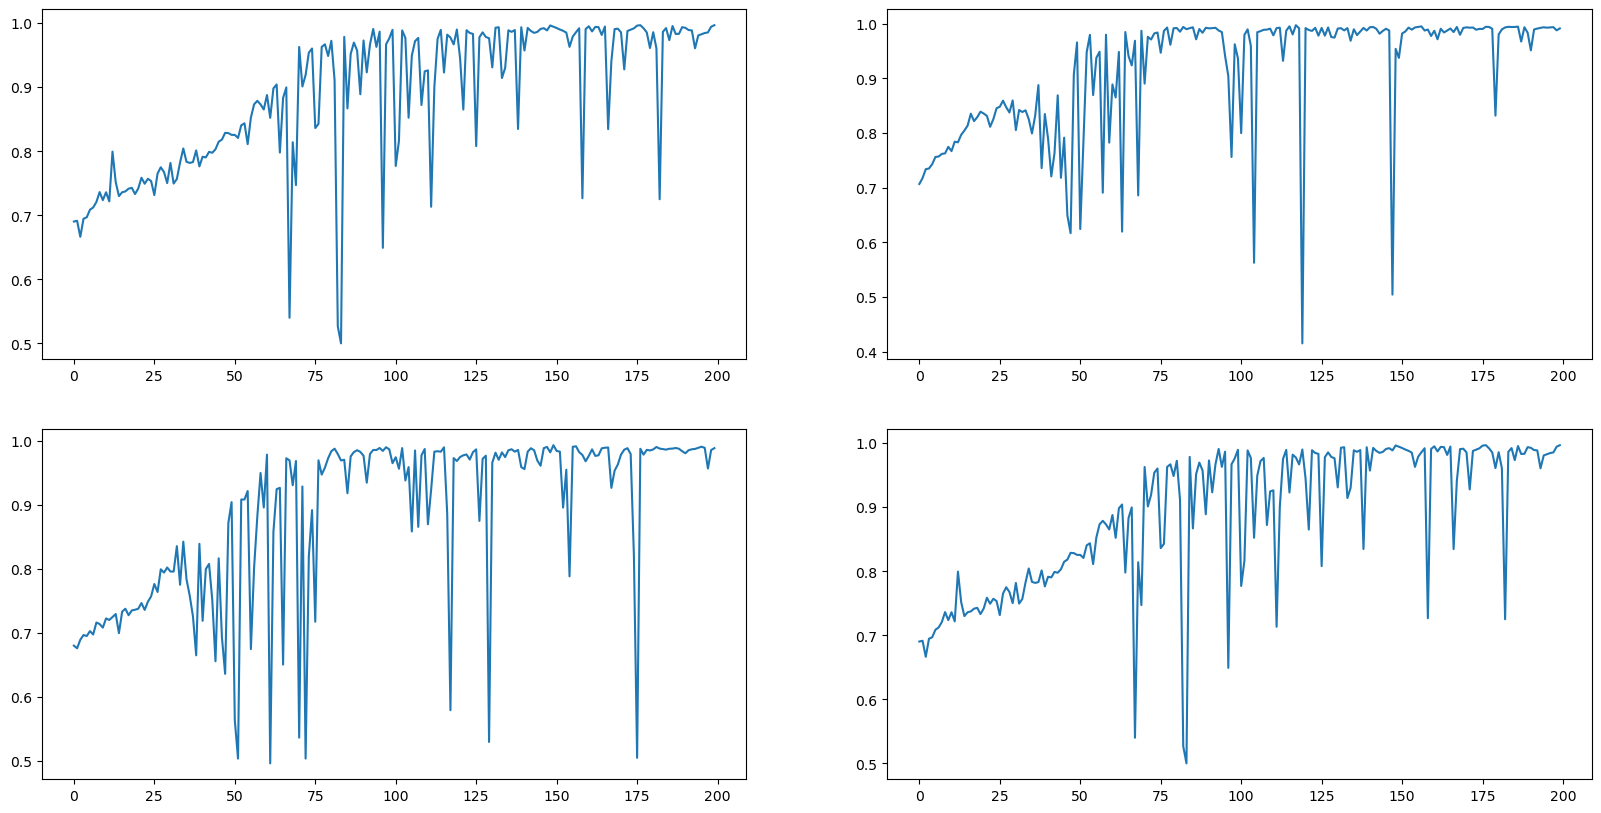

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(range(200), cv_auc_df.loc[:,cv].values)
        cv += 1
plt.show()

In [35]:
cv_auc_df.max()

0    0.996933
1    0.997346
2    0.993089
3    0.996933
dtype: float64

### Check reshaped projections

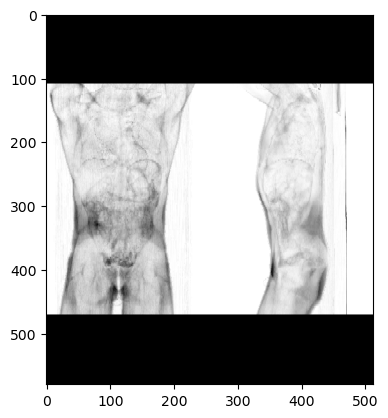

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
image = np.load("/media/andres/T7 Shield1/UCAN_project/collages/reshaped_collages/lpr385705046400/20140313/CT_adipose.npy")
plt.imshow(image, cmap="gray")
plt.show()

In [38]:
path ="/home/ashish/Ashish/UCAN/ReshapedCollages/collages/raw_collages/lpr385705046400/20140313/"
lst1 = ["SUV_", "CT_"]

lst2 = ["MIP.npy","bone.npy","lean.npy","adipose.npy","air.npy"]

In [39]:
arr1 = np.load(path + "SUV_MIP.npy")
arr2 = np.load(path + "SUV_lean.npy")
arr3 = np.load(path + "CT_MIP.npy")
arr4 = np.load(path + "SUV_adipose.npy")

In [40]:
(arr2==arr4).all()

False

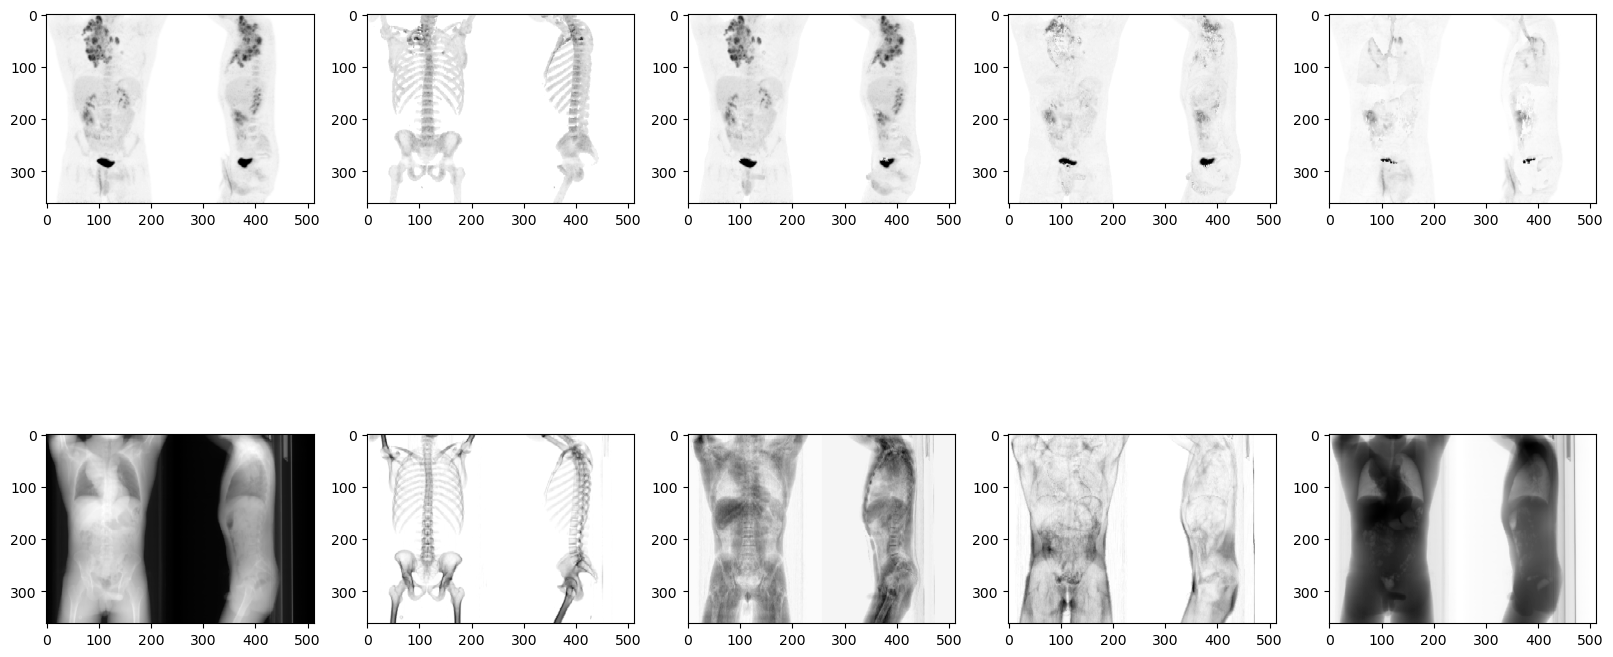

In [41]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        img = np.load(path + lst1[i] + lst2[j])
        axs[i, j].imshow(img,cmap="gray")
        cv += 1
plt.show()

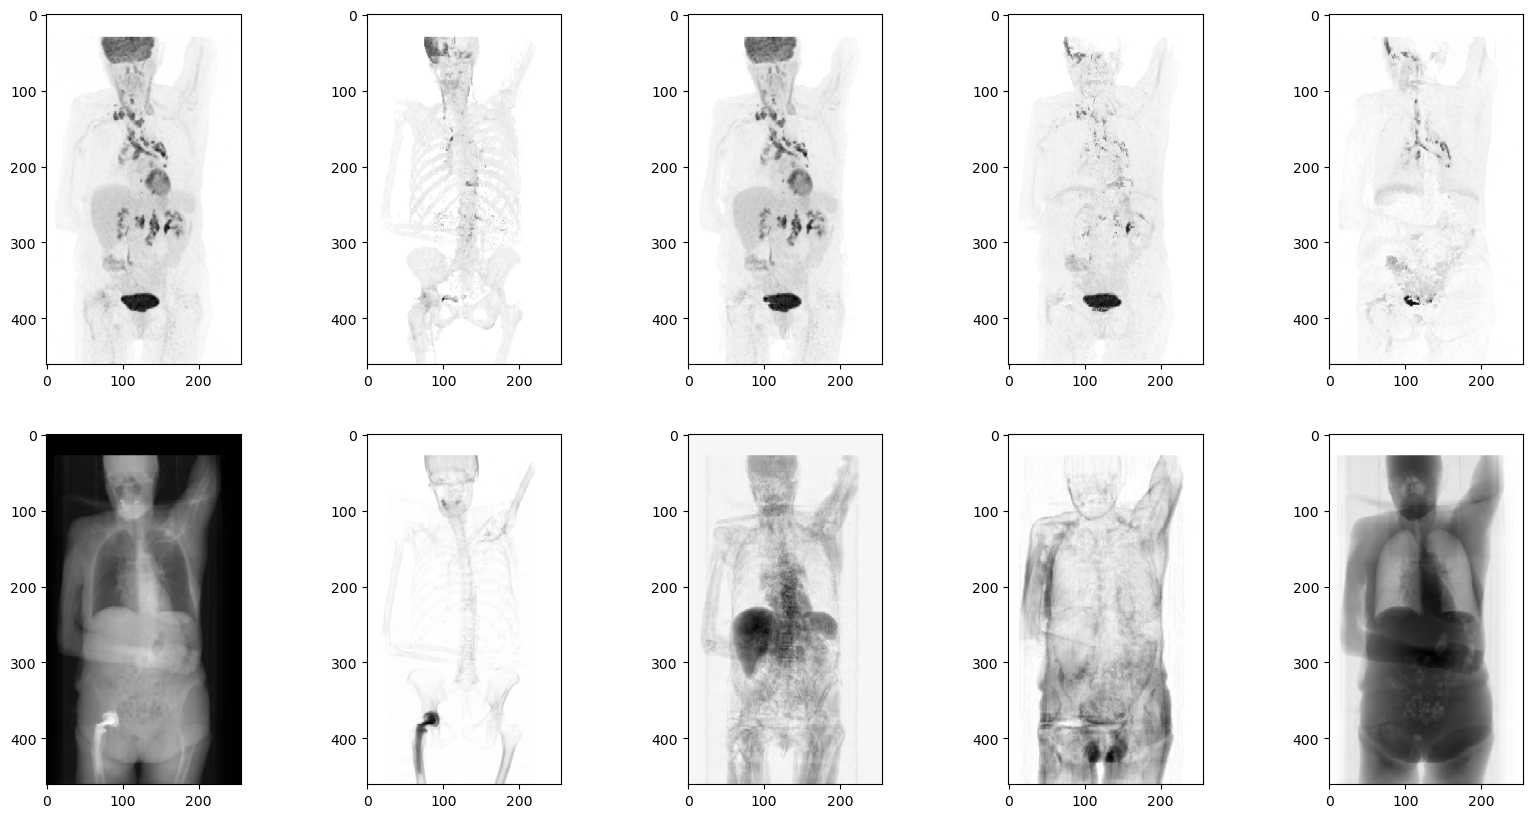

In [33]:
path = "/home/ashish/Ashish/UCAN/ReshapedCollages/raw_projections/npr110222274795/20220512/"

lst1 = ["SUV_", "CT_"]

lst2 = ["MIP","bone","lean","adipose","air"]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        img = np.load(path + lst1[i] + lst2[j] + "/-90.0.npy")
        axs[i, j].imshow(img,cmap="gray")
        cv += 1
plt.show()